<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte integración


In [ ]:
#Punto 24 (Tierra plana)

# (a)
import numpy as np
import matplotlib.pyplot as plt
xi,wi = np.polynomial.legendre.leggauss(50)

In [ ]:
# (b)
k= -0.12495122165232053
def dg(ϕ,r,x,y,z):
  return (k*z*r)/((x**2 + y**2 + z**2 -2*r*x*np.cos(ϕ) -2*r*y*np.sin(ϕ))+0j)**(3/2)

In [ ]:
# (c)
a=0
b=2*np.pi
c=0
R=1

def g(x,y,z):
  sum = 0
  for i in range (len(xi)):
    for j in range (len(xi)):
      tϕ = 0.5*((b-a)*xi[i] + b + a)
      tr = 0.5*((R-c)*xi[j] + R + c)
      sum += 0.25*(b-a)*(R-c)*np.sum(np.sum(wi[i]*wi[j]*dg(tϕ,tr,x,y,z)))

  return sum

In [ ]:
# (d)
g(0.,0.,0.2) #Se modificó el valor de K a -0.12495122165232053 para obtener el valor predicho de la gravedad

(-152.59739646274767+0j)

In [ ]:
# (e)
def polares(r,θ):
  x=r*np.cos(θ)
  y=r*np.sin(θ)
  return x,y

In [ ]:
u=np.linspace(0,2*np.pi,10)

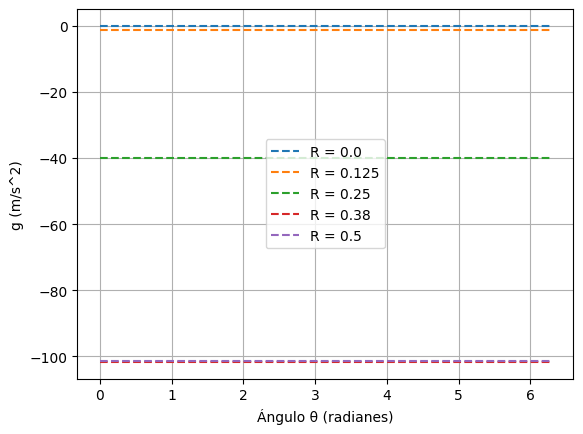

In [ ]:
R_values = [0.0, 0.125, 0.25, 0.38, 0.5]

for R in R_values:
    g_values = [g(*polares(R,u), 0.2) for phi in u]
    plt.plot(u, g_values, linestyle="--", label=f"R = {R}")

plt.xlabel('Ángulo θ (radianes)')
plt.ylabel('g (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# En caso de haber obtenido los resultados esperados:

In [ ]:
#(f)
""" El punto no se refiere al ángulo de elevación sobre la superficie,
sino al ángulo que se forma en la superficie respecto al eje (θ de las polares).
El hecho del valor de la gravedad no depende de dicho ángulo implica que
solamente la distancia respecto al centro del disco es el factor determinante
para el valor de la gravedad."""

In [ ]:
# (g) Lo intentamos UnU

In [ ]:
#(h)
"""La tierra no puede ser un disco debido a que el valor de la gravedad
varía demadiaso de un lugar a otro en función de la distancia de separación
desde el polo, lo cual no sucede en la realidad."""

In [ ]:
#Punto 26
 # (e)

def funcion(x):
  return x**3
a=0
b=2

def integral(n):
  roots, weights = np.polynomial.legendre.leggauss(n)
  t=0.5*((b-a)*roots+a+(b-a))
  return (b-a)/2*np.sum(weights*funcion(t))

In [ ]:
integral(30)

4.0000000000000115

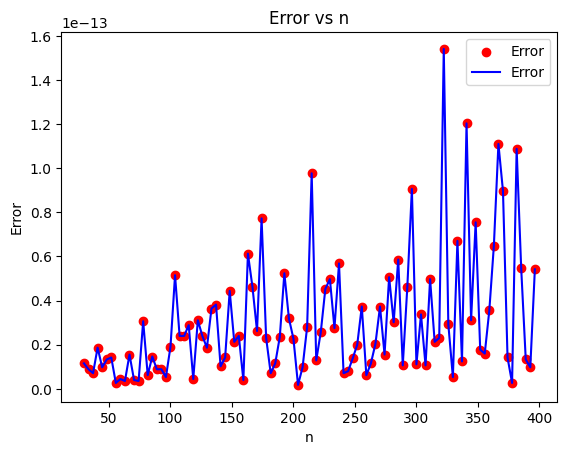

In [ ]:
# (f)
Exacta = 4
n=np.linspace(30,400,100, endpoint=False)
n_int=n.astype(int)
Estimada = np.array([integral(ni) for ni in n_int])

Error = abs(Exacta - Estimada)

plt.scatter(n,Error, label='Error', color='r')
plt.plot(n,Error, label='Error', color='b')
plt.title('Error vs n')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#(g)

"""La suma de Riemann no es una buena estrategia para estimación de integrales si la comparamos como
los métodos de cuadratura de gauss, pues, para que la suma de Riemann converja al valor de la integral, el
valor de n debe ser muy grande, mientras que para que las cuadraturas de gauss converjan al valor de la
integral, no  hace falta que el valor de n sea grande."""


In [ ]:
# Punto 27
import time

G8=(lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**0 + w1*x1**0 + w2*x2**0 + w3*x3**0 -2, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**1 + w1*x1**1 + w2*x2**1 + w3*x3**1, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**2 + w1*x1**2 + w2*x2**2 + w3*x3**2 -2/3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**3 + w1*x1**3 + w2*x2**3 + w3*x3**3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**4 + w1*x1**4 + w2*x2**4 + w3*x3**4 -2/5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**5 + w1*x1**5 + w2*x2**5 + w3*x3**5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**6 + w1*x1**6 + w2*x2**6 + w3*x3**6 -2/7,\
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**7 + w1*x1**7 + w2*x2**7 + w3*x3**7,)

def GetF(f,r):

  dim = len(f)
  v = np.zeros(dim)

  for i in range(dim):
    v[i] = f[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])

  return v

def GetJacobian8(f, r, h=1e-3):
    dim = len(r)
    J = np.zeros((len(f), dim))

    for i in range(len(f)):
        for j in range(dim):
            dr = np.zeros(dim)
            dr[j] = h

            J[i, j] = (f[i](r[0]+dr[0],r[1]+dr[1],r[2]+dr[2],r[3]+dr[3],r[4]+dr[4],r[5]+dr[5],r[6]+dr[6],r[7]+dr[7]) - \
                       f[i](r[0]-dr[0],r[1]-dr[1],r[2]-dr[2],r[3]-dr[3],r[4]-dr[4],r[5]-dr[5],r[6]-dr[6],r[7]-dr[7])) / (2*h)
    return J.T

def GetMetric8(f,r):
  v=GetF(f,r)
  return 0.5*np.linalg.norm(v)**2

def descenso(f, r, lr, epoch, err):


  r=r.astype(np.float64)

  d=1
  it=0
  Vector = np.array([])
  R_vector = np.array(r)

  while d>err and it<epoch:

    Current = GetMetric8(f,r)
    J = GetJacobian8(f,r)
    Gvector = GetF(f,r)

    r-= lr*np.dot(J,Gvector)
    R_vector = np.vstack((R_vector,r))
    New=GetMetric8(f,r)
    Vector=np.append(Vector,New)
    d=abs(Current-New)/New

    if it%500==0:
      time.sleep(0.01)

    it+=1

  return r,it

In [ ]:
sol=descenso(G8,np.random.uniform(-1.,1.,size=8),0.01,100000,1e-4)
sol

(array([ 0.53923137,  0.05350543,  0.5020755 ,  0.90436219, -0.79058237,
         0.24473436,  0.8031961 ,  0.01229379]),
 4394)

In [ ]:
f=lambda x: np.cos(x)
I = np.sum(sol[0][:4] * f(sol[0][4:]))
I

1.684163691522904

Parte álgebra lineal


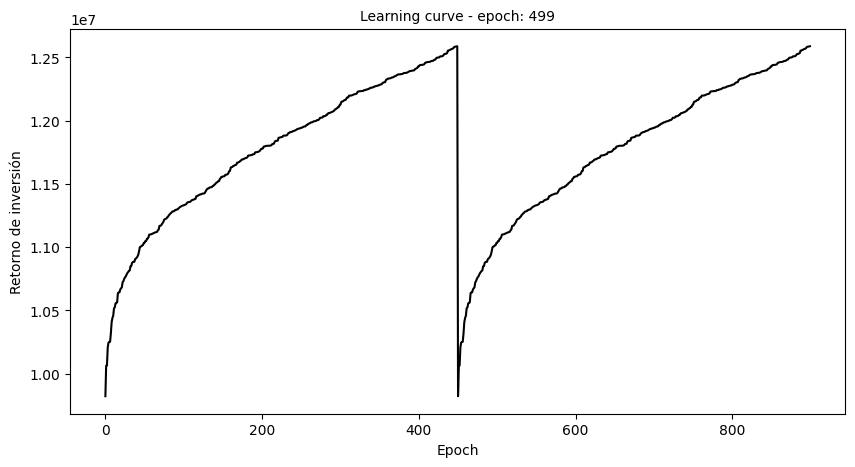

Pesos: [0.57396589 0.04315875 0.21310071 0.05055347 0.01955647 0.04750255
 0.0497425  0.00241966], Fitness: 9797228.856990023


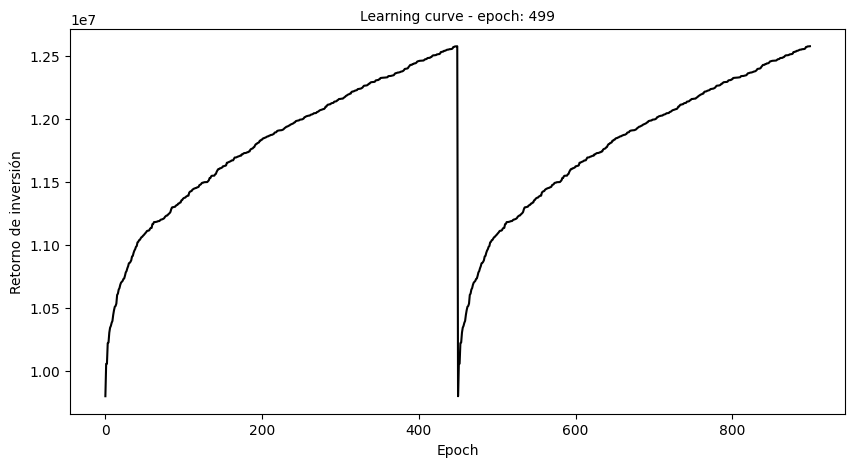

NameError: name 'w' is not defined

In [1]:
#Punto 24

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

# (a)
Ca = 1000000
C = [8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69]  # Vector de cuotas

def Plotter(Ca, robots):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title('Learning curve - epoch: {:.0f}'.format(Ca), fontsize=10)
    fitness_values = [robot.Fitness for robot in robots]
    ax.plot(range(len(robots)), fitness_values, color='k')

    plt.xlabel('Epoch')
    plt.ylabel('Retorno de inversión')
    plt.pause(0.001)
    plt.show()
    return fig, ax

#(b)
def retorno(w, Ca, C):
    wc = np.dot(w, C)
    return Ca * (wc - 1)

#(c)
class Robot:
    def __init__(self, retorno, C, rate=0.1):
        self.retorno = retorno
        self.cuotas = C
        self.rate = rate

#(d)
        self.r = np.random.uniform(0., 1., size=len(self.cuotas))
        self.r = self.r / np.sum(self.r)
        self.fitness = 0

    def GetR(self):
        return self.r

#(e)
    def Mutate(self):
        self.r += np.random.normal(loc=0., scale=self.rate, size=len(self.cuotas))
        self.r = np.abs(self.r)
        self.r = self.r / np.sum(self.r)

    def SetFitness(self):
        self.fitness = np.abs(self.retorno(self.r, Ca, self.cuotas))

    @property
    def Fitness(self):
        return self.fitness

    def __repr__(self):
        return f"Pesos: {self.r}, Fitness: {self.fitness}"

def GetRobots(N):
    return [Robot(retorno, C) for _ in range(N)]

def Genetic(Robots, epochs=30):
    N = int(0.9 * len(Robots))
    for e in range(epochs):
        clear_output(wait=True)
        Plotter(e, Robots)

        for robot in Robots:
            robot.Mutate()
            robot.SetFitness()

        Robots.sort(key=lambda x: x.Fitness)
        Robots = Robots[:N] + copy.deepcopy(Robots[:N])
        print (Robots[0])
        Plotter(e, Robots)
        time.sleep(0.1)

#(f)
Robots = GetRobots(500)
Genetic(Robots, epochs=500)

In [ ]:
#(g)
 """Si hubiéramos obtenido el valor teórico con los pesos: w = [0.185, 0.152, 0.137, 0.125, 0.116, 0.107, 0.096, 0.082]
entonces, el dinero que se debería invertir en cada opción, considerando un capital total de 1,000,000, sería el siguiente:

1. 0.185 X 1,000,000 = 185,000
2. 0.152 X 1,000,000 = 152,000
3. 0.137 X 1,000,000 = 137,000
4. 0.125 X 1,000,000 = 125,000
5. 0.116 X 1,000,000 = 116,000
6. 0.107 X 1,000,000 = 107,000
7. 0.096 X 1,000,000 = 96,000
8. 0.082 X 1,000,000 = 82,000

Por otro lado, a partir de las ponderaciones y las cuotas del mercado, los
retornos mínimos y máximos posibles serían:

  Rmin= 1,000,000 X (1.57435 - 1) = 574,350
  Rmax = 1,000,000 X (2.02458 - 1) = 1,024,580

Finalmente, podemos concluir que si se gana dinero con esta estrategia. El retorno mínimo es de 574,350, y el retorno máximo es de 1,024,580.
Esto significa que, incluso en el peor de los casos, el retorno es positivo, garantizando una ganancia con las inversiones
realizadas en función de esta ponderación."""